<a href="https://colab.research.google.com/github/leul12/Data_Exploration/blob/main/tweet_stalking_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import itertools
from datetime import datetime
import datetime
import time
from pandas.io.json import json_normalize
import json
from tqdm.notebook import tqdm_notebook
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")

## Let's Check the version 🐍

In [3]:
from platform import python_version
print(python_version())

3.8.16


## Okay now we can do our **job**

1.   Let's install the 🔨
2.   Extract the 🗄️
3.   And So on



# ⬆️ install the tool 🔨

In [4]:
pip install git+https://github.com/JustAnotherArchivist/snscrape.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/JustAnotherArchivist/snscrape.git to /tmp/pip-req-build-r44jbkn9
  Running command git clone --filter=blob:none --quiet https://github.com/JustAnotherArchivist/snscrape.git /tmp/pip-req-build-r44jbkn9
  Resolved https://github.com/JustAnotherArchivist/snscrape.git to commit cbdaee6864aa8d3e9e4326d4fe224a517aabbc2c
  Preparing metadata (setup.py) ... done
  Created wheel for snscrape: filename=snscrape-0.4.3.20220107.dev73+gcbdaee6-py3-none-any.whl size=68025 sha256=340c138de883445ce584d1a5887107dde9cc44b13e3dcd560ac7a4b7c6d84213
  Stored in directory: /tmp/pip-ephem-wheel-cache-uexlnl1m/wheels/92/42/87/33fa9b18f7a75d02643a9ca3743339aec9be28c6796267c7d8
Successfully built snscrape


## 🤔   **how to extract the tweets ?** no worries ⬇️

In [5]:
import snscrape.modules.twitter as sntwitter

# okay now some magic to get the actual 🐦 using the **itertools** 😉

In [22]:
df = pd.DataFrame(itertools.islice(
    sntwitter.TwitterSearchScraper('#vaccine').get_items(), 30))
# let's Test what kind of data we can get from it (if it works)
df.head(2)

,url,date,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,...,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card
0,https://twitter.com/denton_lucinda/status/1610...,2023-01-04 08:12:04+00:00,I just bought many items at a surprise price s...,I just bought many items at a surprise price s...,1610549612078854145,"{'username': 'denton_lucinda', 'id': 160014679...",0,0,0,0,...,None,None,None,None,None,None,None,[Vaccine],None,{'componentObjects': {'media_1': {'mediumKey':...
1,https://twitter.com/Alwoo_ak_47/status/1610549...,2023-01-04 08:11:43+00:00,Anymore question about #vaccine??? https://t....,Anymore question about #vaccine??? https://t....,1610549523771695104,"{'username': 'Alwoo_ak_47', 'id': 143384108011...",0,0,0,0,...,None,None,None,None,None,None,None,[vaccine],None,None


# okay Now that we got this out of the way what now 🤔


*   we check data heads
*   clean some columns [user , hastags , date , mentionedUsers & inReplyToUser ]
*   and take it form there 
*   🚶‍♂️



In [23]:
dfuser= pd.json_normalize(df['user'])
dfuser.head(2)

,username,id,displayname,rawDescription,renderedDescription,descriptionLinks,verified,created,followersCount,friendsCount,...,location,protected,link,profileImageUrl,profileBannerUrl,label,link.text,link.url,link.tcourl,link.indices
0,denton_lucinda,1600146797573206016,LUCINDA DENTON,Student | 20 | Welcome to my profile. | Plz he...,Student | 20 | Welcome to my profile. | Plz he...,"[{'text': 'shr.temu.com/Nc4KDY2zz5AJ8a', 'url'...",False,2022-12-06 15:15:26+00:00,3,174,...,,False,NaN,https://pbs.twimg.com/profile_images/160014708...,https://pbs.twimg.com/profile_banners/16001467...,None,NaN,NaN,NaN,NaN
1,Alwoo_ak_47,1433841080114548736,Unacceptable Alwoo,Never give up!!! \nNever loose critical thinki...,Never give up!!! \nNever loose critical thinki...,None,False,2021-09-03 17:15:43+00:00,391,364,...,"Toronto, Ontario",False,NaN,https://pbs.twimg.com/profile_images/145811369...,https://pbs.twimg.com/profile_banners/14338410...,None,NaN,NaN,NaN,NaN


# NOw Let's Take what we need and add the to the main Data Frame ⚙️

In [24]:
dfuser.drop(['id','displayname','rawDescription','renderedDescription','descriptionLinks','location','statusesCount','favouritesCount','listedCount',
                  'mediaCount','link','profileImageUrl','profileBannerUrl','label','link.text','link.url','link.tcourl','link.indices'], axis = 1, inplace = True)
dfuser.head(2)

,username,verified,created,followersCount,friendsCount,protected
0,denton_lucinda,False,2022-12-06 15:15:26+00:00,3,174,False
1,Alwoo_ak_47,False,2021-09-03 17:15:43+00:00,391,364,False


# now that we 🫧 the 🧫  time to add it to the clean data sets

In [25]:
df2=df.drop(['user','renderedContent','sourceUrl','hashtags','cashtags','card','inReplyToTweetId','inReplyToUser','mentionedUsers','coordinates','links','media','retweetedTweet','quotedTweet','place'],axis=1)
df2.head(2)

,url,date,rawContent,id,replyCount,retweetCount,likeCount,quoteCount,conversationId,lang,source,sourceLabel
0,https://twitter.com/denton_lucinda/status/1610...,2023-01-04 08:12:04+00:00,I just bought many items at a surprise price s...,1610549612078854145,0,0,0,0,1610549612078854145,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Twitter Web App
1,https://twitter.com/Alwoo_ak_47/status/1610549...,2023-01-04 08:11:43+00:00,Anymore question about #vaccine??? https://t....,1610549523771695104,0,0,0,0,1610549523771695104,en,"<a href=""http://twitter.com/download/android"" ...",Twitter for Android


In [27]:
result = pd.concat([df2, dfuser], axis=1)
result.reset_index(drop=True)
result.head(2)

,url,date,rawContent,id,replyCount,retweetCount,likeCount,quoteCount,conversationId,lang,source,sourceLabel,username,verified,created,followersCount,friendsCount,protected
0,https://twitter.com/denton_lucinda/status/1610...,2023-01-04 08:12:04+00:00,I just bought many items at a surprise price s...,1610549612078854145,0,0,0,0,1610549612078854145,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Twitter Web App,denton_lucinda,False,2022-12-06 15:15:26+00:00,3,174,False
1,https://twitter.com/Alwoo_ak_47/status/1610549...,2023-01-04 08:11:43+00:00,Anymore question about #vaccine??? https://t....,1610549523771695104,0,0,0,0,1610549523771695104,en,"<a href=""http://twitter.com/download/android"" ...",Twitter for Android,Alwoo_ak_47,False,2021-09-03 17:15:43+00:00,391,364,False


# let's make the date column the first column ⛹

In [37]:
def swap_columns(result, col1, col2):
    col_list = list(result.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    result = result[col_list]
    return result
res = swap_columns(result,'url','date')

# ⏱️ manuplation

In [60]:
res.sort_values('date')
res.head(2)

,date,url,rawContent,id,replyCount,retweetCount,likeCount,quoteCount,conversationId,lang,source,sourceLabel,username,verified,created,followersCount,friendsCount,protected
0,2023-01-04 08:12:04+00:00,https://twitter.com/denton_lucinda/status/1610...,I just bought many items at a surprise price s...,1610549612078854145,0,0,0,0,1610549612078854145,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Twitter Web App,denton_lucinda,False,2022-12-06 15:15:26+00:00,3,174,False
1,2023-01-04 08:11:43+00:00,https://twitter.com/Alwoo_ak_47/status/1610549...,Anymore question about #vaccine??? https://t....,1610549523771695104,0,0,0,0,1610549523771695104,en,"<a href=""http://twitter.com/download/android"" ...",Twitter for Android,Alwoo_ak_47,False,2021-09-03 17:15:43+00:00,391,364,False


### okay now to the 🖼️ part



1.    **what are people using when tweeting** 🤔




In [52]:
dfpie= res.groupby('sourceLabel').count()
dfpie

,date,url,rawContent,id,replyCount,retweetCount,likeCount,quoteCount,conversationId,lang,source,username,verified,created,followersCount,friendsCount,protected
sourceLabel,,,,,,,,,,,,,,,,,
MeetEdgar,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
ProxyCentral NW18,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
TweetDeck,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Twitter Web App,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
Twitter for Android,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
Twitter for iPhone,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4


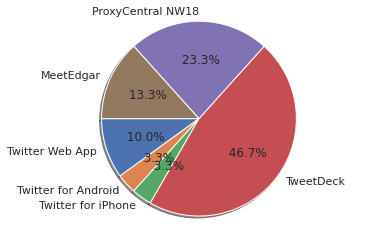

In [58]:
labels = pd.unique(res['sourceLabel'])
sizes = dfpie['id']
fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels, autopct='%5.1f%%',shadow=True, startangle=180)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


2.   okay now that we know what platform people use to tweet we can go deeper and find out the tweet let's say that used "Twitter for Android" 🤓

